<a href="https://colab.research.google.com/github/ZahraFarahzadii/Movie-prediction/blob/main/miniproject2_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
import math
import matplotlib.animation as animation
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras.utils
from tensorflow.python.keras.models import Sequential,Model
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
import datetime
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay
import seaborn as sb
import pandas as pd
from sklearn.utils import shuffle
from keras import backend as K
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPooling2D, Activation,Flatten, Dense, Dropout
from tensorflow.keras.models import model_from_json
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import GRU
from keras.layers import TimeDistributed
from keras.layers import LSTM, Dense, Dropout,GRU,SimpleRNN

In [ ]:
epsilon=0
g = 9.81
m=0.1
l = 1.0

In [ ]:
def model (alpha,t):
  Wn=math.sqrt(g/l)
  alpha1=alpha[0]
  alpha2=alpha[1]
  alpha1_dot=alpha2
  alpha2_dot= - (2*epsilon*Wn*alpha2+ math.pow(Wn,2)*math.sin(alpha1))
  alpha_dot=[alpha1_dot,alpha2_dot]
  return alpha_dot

In [ ]:
alpha1_ini=0
alpha2_ini=5
alpha_ini=[alpha1_ini,alpha2_ini]

In [ ]:
t=np.linspace(0,10,150)
alpha=odeint(model,alpha_ini,t)

In [ ]:
def plot_results(time, theta1, theta2):
  plt.figure()
  plt.plot(t,alpha[:,0],'r')
  plt.plot(t,alpha[:,1],'c')
  plt.ylabel('plot')
  plt.xlabel('time')
  plt.legend(loc='best')
  plt.show()

No handles with labels found to put in legend.


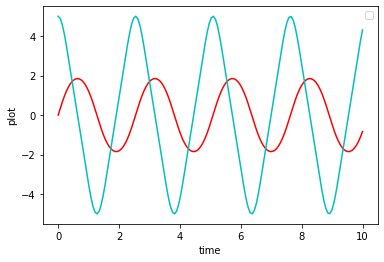

In [ ]:
plot_results(t, alpha[0], alpha[1])

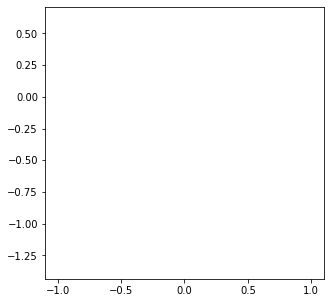

In [ ]:
fig=plt.figure(figsize=(5,5),facecolor='w')
ax=fig.add_subplot(1,1,1)
plt.rcParams['font.size']=15
lns=[]
for i in range(len(alpha)):
  ln,=ax.plot([0,np.sin(alpha[i,0])],[0,-np.cos(alpha[i,0])],color='k',lw=2)
  bob,=ax.plot(np.sin(alpha[i,0]),-np.cos(alpha[i,0]),'o',markersize=20,color='r')
  tm=ax.text(-0.9,0.25,'Time=%.1fs'%t[i])
  lns.append([ln,bob,tm])

ax.set_aspect('equal','datalim')
ani=animation.ArtistAnimation(fig,lns,interval=50)
fn='Pendulum_Animation'
ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)

In [ ]:
x=np.sin(alpha[:,0])
y=-(np.cos(alpha[:,0]))


In [ ]:
import cv2
import os
# Opens the Video file
cap= cv2.VideoCapture('/content/Pendulum_Animation.mp4')
try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()

    if ret == False:
        break
    cv2.imwrite('./data/'+str(i)+'.png',frame)
    i+=1

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import os
from os.path import isfile, join
u=np.zeros(150)
a=os.listdir('/content/data')
print(a)
l=[]
for i in range (150):
  for j in range(150):
    if str(i)+'.png'==a[j]:
      l.append(a[j])
print(l)
s='/content/data/'
d=[]
for i in l:
  d.append(cv2.imread(s+i))
d=np.array(d)
print(type(d))

['139.png', '75.png', '109.png', '90.png', '129.png', '18.png', '113.png', '24.png', '110.png', '108.png', '17.png', '103.png', '144.png', '66.png', '52.png', '70.png', '60.png', '94.png', '143.png', '3.png', '91.png', '71.png', '86.png', '15.png', '22.png', '115.png', '99.png', '77.png', '81.png', '59.png', '12.png', '122.png', '83.png', '32.png', '135.png', '62.png', '43.png', '105.png', '101.png', '39.png', '50.png', '134.png', '9.png', '146.png', '72.png', '31.png', '48.png', '27.png', '40.png', '149.png', '76.png', '142.png', '57.png', '148.png', '116.png', '104.png', '64.png', '140.png', '126.png', '33.png', '93.png', '138.png', '102.png', '19.png', '130.png', '29.png', '10.png', '28.png', '16.png', '114.png', '118.png', '8.png', '68.png', '53.png', '124.png', '98.png', '141.png', '25.png', '56.png', '54.png', '106.png', '63.png', '5.png', '120.png', '112.png', '36.png', '4.png', '84.png', '55.png', '79.png', '119.png', '21.png', '133.png', '20.png', '117.png', '145.png', '123.pn

In [ ]:
input_data=np.zeros((140,10,360,360,3))
for i in range(140):
  for j in range(10):
    input_data[i,:,:,:,:]=d[j+i]

255.0
0.0
(140, 10, 360, 360, 3)


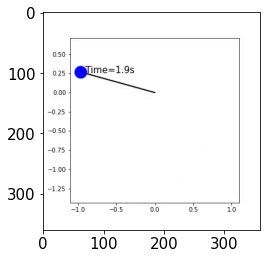

In [ ]:
print(np.max(input_data))
print(np.min(input_data))
input_data=input_data/np.max(input_data)
print(input_data.shape)
g=input_data[20]
plt.imshow(g[8])

In [ ]:
x=np.sin(alpha[:,0])
y=-(np.cos(alpha[:,0]))

target=np.zeros((140,2))
for i in range(140):
  target[i,0]=x[i+10]
  target[i,1]=y[i+10]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_data,target, test_size=0.25, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 10, 360, 360, 3)
(105, 2)
(35, 10, 360, 360, 3)
(35, 2)


In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
model.add(TimeDistributed(MaxPooling2D((2,2))))

model.add(TimeDistributed(Dropout(rate=0.25)))
model.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))


model.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))

model.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100 ))
model.add(Dense(128))
model.add(Dense(2))


In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
model.compile(optimizer=Adam_opt, loss='MSE', metrics=['accuracy'])

In [ ]:

t0=datetime.datetime.now()
history =model.fit(x_train,y_train , batch_size=8, epochs=30, validation_split=0.2)
t1=datetime.datetime.now()

Epoch 1/30
11/11 [==============================] - 17s 512ms/step - loss: 3.8754 - accuracy: 0.5819 - val_loss: 0.5269 - val_accuracy: 0.5714
Epoch 2/30
11/11 [==============================] - 3s 279ms/step - loss: 0.4960 - accuracy: 0.4726 - val_loss: 0.4795 - val_accuracy: 0.4286
Epoch 3/30
11/11 [==============================] - 3s 278ms/step - loss: 0.4866 - accuracy: 0.4709 - val_loss: 0.4544 - val_accuracy: 0.5714
Epoch 4/30
11/11 [==============================] - 3s 273ms/step - loss: 0.4646 - accuracy: 0.6616 - val_loss: 0.4702 - val_accuracy: 0.5714
Epoch 5/30
11/11 [==============================] - 3s 275ms/step - loss: 0.4859 - accuracy: 0.5503 - val_loss: 0.4750 - val_accuracy: 0.5714
Epoch 6/30
11/11 [==============================] - 3s 277ms/step - loss: 0.4970 - accuracy: 0.5866 - val_loss: 0.4774 - val_accuracy: 0.5714
Epoch 7/30
11/11 [==============================] - 3s 278ms/step - loss: 0.4849 - accuracy: 0.5915 - val_loss: 0.4663 - val_accuracy: 0.5714
Epoch

In [ ]:

print('Accuracy = ', history.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1-t0)

Accuracy =  100.0 %
Time =  0:01:45.421091


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 10, 354, 354, 32)  4736      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 177, 177, 32)  0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 177, 177, 32)  0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 173, 173, 64)  51264     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 10, 86, 86, 64)    0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 82, 82, 128)   204928    
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 41, 41, 128)   0

In [ ]:
deghat=model.evaluate(x_test,y_test)
print('deghat:',deghat[1]*100)

2/2 [==============================] - 2s 332ms/step - loss: 0.0274 - accuracy: 0.9714
deghat: 97.14285731315613


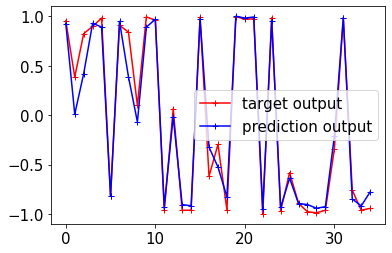

In [ ]:
yout=model.predict(x_test)

plt.figure()
plt.plot(y_test[:,0],marker='+',c='red')
plt.plot(yout[:,0],marker='+',c='blue')
plt.legend(['target output','prediction output'])
plt.show()

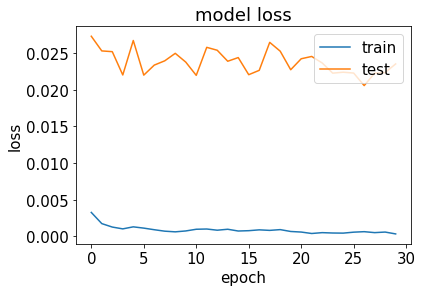

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# GRU

In [ ]:
model1 = Sequential()
model1.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
model1.add(TimeDistributed(MaxPooling2D((2,2))))

model1.add(TimeDistributed(Dropout(rate=0.25)))
model1.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
model1.add(TimeDistributed(MaxPooling2D((2,2))))


model1.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
model1.add(TimeDistributed(MaxPooling2D((2,2))))
model1.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
model1.add(TimeDistributed(MaxPooling2D((2,2))))

model1.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
model1.add(TimeDistributed(MaxPooling2D((2,2))))
model1.add(TimeDistributed(Flatten()))
model1.add(GRU(96))
model1.add(Dense(128))
model1.add(Dense(2))

In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
model1.compile(optimizer=Adam_opt, loss='MSE', metrics=['accuracy'])
t0=datetime.datetime.now()
history1 =model1.fit(x_train,y_train , batch_size=8, epochs=30, validation_split=0.2)
t1=datetime.datetime.now()

Epoch 1/30
11/11 [==============================] - 11s 502ms/step - loss: 6.8794 - accuracy: 0.5029 - val_loss: 0.5337 - val_accuracy: 0.4286
Epoch 2/30
11/11 [==============================] - 3s 290ms/step - loss: 0.5537 - accuracy: 0.6915 - val_loss: 0.7896 - val_accuracy: 0.5714
Epoch 3/30
11/11 [==============================] - 3s 291ms/step - loss: 0.7669 - accuracy: 0.5083 - val_loss: 0.5268 - val_accuracy: 0.4286
Epoch 4/30
11/11 [==============================] - 3s 292ms/step - loss: 0.5458 - accuracy: 0.4075 - val_loss: 0.4763 - val_accuracy: 0.5714
Epoch 5/30
11/11 [==============================] - 3s 290ms/step - loss: 0.4687 - accuracy: 0.6147 - val_loss: 0.4614 - val_accuracy: 0.5714
Epoch 6/30
11/11 [==============================] - 3s 290ms/step - loss: 0.4940 - accuracy: 0.6730 - val_loss: 0.4643 - val_accuracy: 0.4286
Epoch 7/30
11/11 [==============================] - 3s 292ms/step - loss: 0.4858 - accuracy: 0.5234 - val_loss: 0.4982 - val_accuracy: 0.5714
Epoch

In [ ]:
print('Accuracy = ', history1.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1-t0)
deghat1=model1.evaluate(x_test,y_test)
print('deghat:',deghat1[1]*100)

Accuracy =  57.14285969734192 %
Time =  0:01:44.252073
2/2 [==============================] - 2s 333ms/step - loss: 0.4835 - accuracy: 0.6000
deghat: 60.00000238418579


In [ ]:
yout_GRU=model1.predict(x_test)
np.max(yout_GRU)

0.14397463

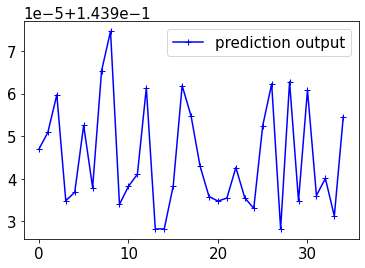

In [ ]:
plt.plot(yout_GRU[:,0],marker='+',c='blue')
plt.legend(['prediction output'])

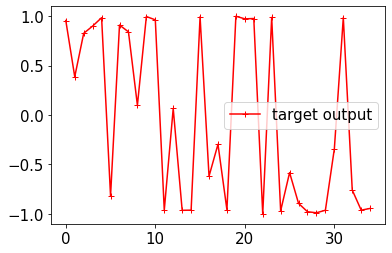

In [ ]:

plt.plot(y_test[:,0],marker='+',c='red')
plt.legend(['target output'])

RNN

In [ ]:
model2 = Sequential()
model2.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
model2.add(TimeDistributed(MaxPooling2D((2,2))))

model2.add(TimeDistributed(Dropout(rate=0.25)))
model2.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
model2.add(TimeDistributed(MaxPooling2D((2,2))))


model2.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
model2.add(TimeDistributed(MaxPooling2D((2,2))))
model2.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
model2.add(TimeDistributed(MaxPooling2D((2,2))))

model2.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
model2.add(TimeDistributed(MaxPooling2D((2,2))))
model2.add(TimeDistributed(Flatten()))
model2.add(SimpleRNN(200))
model2.add(Dense(128))
model2.add(Dense(2))

In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
model2.compile(optimizer=Adam_opt, loss='MSE', metrics=['accuracy'])
t0=datetime.datetime.now()
history2 =model2.fit(x_train,y_train , batch_size=8, epochs=30, validation_split=0.2)
t1=datetime.datetime.now()

Epoch 1/30
11/11 [==============================] - 5s 332ms/step - loss: 4.7894 - accuracy: 0.6056 - val_loss: 0.9431 - val_accuracy: 0.5714
Epoch 2/30
11/11 [==============================] - 3s 282ms/step - loss: 1.3553 - accuracy: 0.6193 - val_loss: 1.3680 - val_accuracy: 0.4286
Epoch 3/30
11/11 [==============================] - 3s 280ms/step - loss: 1.0489 - accuracy: 0.4688 - val_loss: 0.8764 - val_accuracy: 0.4286
Epoch 4/30
11/11 [==============================] - 3s 283ms/step - loss: 0.6893 - accuracy: 0.5286 - val_loss: 0.5362 - val_accuracy: 0.5714
Epoch 5/30
11/11 [==============================] - 3s 283ms/step - loss: 0.5810 - accuracy: 0.5601 - val_loss: 0.4705 - val_accuracy: 0.4286
Epoch 6/30
11/11 [==============================] - 3s 281ms/step - loss: 0.5271 - accuracy: 0.4863 - val_loss: 0.4820 - val_accuracy: 0.5714
Epoch 7/30
11/11 [==============================] - 3s 281ms/step - loss: 0.5309 - accuracy: 0.4983 - val_loss: 0.5679 - val_accuracy: 0.5714
Epoch 

In [ ]:
print('Accuracy = ', history2.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1-t0)
deghat2=model2.evaluate(x_test,y_test)
print('deghat:',deghat2[1]*100)

Accuracy =  57.14285969734192 %
Time =  0:01:35.168565
2/2 [==============================] - 0s 35ms/step - loss: 0.5528 - accuracy: 0.6000
deghat: 60.00000238418579


In [ ]:
yout_RNN=model2.predict(x_test)


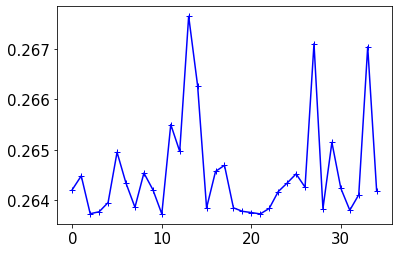

In [ ]:

plt.plot(yout_RNN[:,0],marker='+',c='blue')



part 5 mse & mean_squared_error

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
model.add(TimeDistributed(MaxPooling2D((2,2))))

model.add(TimeDistributed(Dropout(rate=0.25)))
model.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))


model.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))

model.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100 ))
model.add(Dense(128))
model.add(Dense(2))

In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
model.compile(optimizer=Adam_opt, loss='MSE', metrics=['accuracy'])
t0_mse=datetime.datetime.now()
history_mse =model.fit(x_train,y_train , batch_size=8, epochs=30, validation_split=0.2)
t1_mse=datetime.datetime.now()

Epoch 1/30
11/11 [==============================] - 5s 326ms/step - loss: 2.4231 - accuracy: 0.4379 - val_loss: 0.4676 - val_accuracy: 0.5714
Epoch 2/30
11/11 [==============================] - 3s 279ms/step - loss: 0.4864 - accuracy: 0.5209 - val_loss: 0.4903 - val_accuracy: 0.5714
Epoch 3/30
11/11 [==============================] - 3s 295ms/step - loss: 0.4658 - accuracy: 0.5857 - val_loss: 0.3026 - val_accuracy: 0.8571
Epoch 4/30
11/11 [==============================] - 3s 277ms/step - loss: 0.1967 - accuracy: 0.9672 - val_loss: 0.0597 - val_accuracy: 0.9524
Epoch 5/30
11/11 [==============================] - 3s 275ms/step - loss: 0.0416 - accuracy: 0.9915 - val_loss: 0.0425 - val_accuracy: 0.9524
Epoch 6/30
11/11 [==============================] - 3s 278ms/step - loss: 0.0302 - accuracy: 0.9866 - val_loss: 0.0302 - val_accuracy: 0.9524
Epoch 7/30
11/11 [==============================] - 3s 276ms/step - loss: 0.0205 - accuracy: 0.9454 - val_loss: 0.0442 - val_accuracy: 0.9524
Epoch 

In [ ]:
print('Accuracy = ', history_mse.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1_mse-t0_mse)
deghat_mse=model.evaluate(x_test,y_test)
print('deghat:',deghat[1]*100)

Accuracy =  100.0 %
Time =  0:01:34.414747
2/2 [==============================] - 0s 36ms/step - loss: 0.0229 - accuracy: 0.9714
deghat: 97.14285731315613


In [ ]:
yout_mse=model.predict(x_test)
print(yout_mse.shape)

(35, 2)


In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
model.compile(optimizer=Adam_opt, loss='mean_squared_error', metrics=['accuracy'])
t0_mean=datetime.datetime.now()
history_mean =model.fit(x_train,y_train , batch_size=8, epochs=30, validation_split=0.2)
t1_mean=datetime.datetime.now()

Epoch 1/30
11/11 [==============================] - 5s 327ms/step - loss: 0.0346 - accuracy: 0.9724 - val_loss: 0.0340 - val_accuracy: 0.9524
Epoch 2/30
11/11 [==============================] - 3s 280ms/step - loss: 0.0178 - accuracy: 0.9872 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 3/30
11/11 [==============================] - 3s 279ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 4/30
11/11 [==============================] - 3s 279ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 5/30
11/11 [==============================] - 3s 278ms/step - loss: 0.0015 - accuracy: 0.9958 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 6/30
11/11 [==============================] - 3s 279ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 7/30
11/11 [==============================] - 3s 278ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 

In [ ]:
print('Accuracy = ', history_mean.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1_mean-t0_mean)
deghat_mean=model.evaluate(x_test,y_test)
print('deghat:',deghat1[1]*100)

Accuracy =  100.0 %
Time =  0:01:34.069158
2/2 [==============================] - 0s 37ms/step - loss: 0.0188 - accuracy: 1.0000
deghat: 100.0


In [ ]:
yout_mean=model.predict(x_test)
print(yout_mean.shape)

(35, 2)


<function matplotlib.pyplot.show>

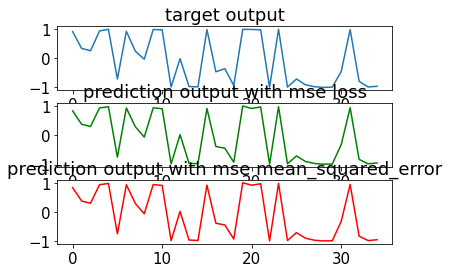

In [ ]:
plt.figure()
plt.subplot(311)
plt.plot(y_test[:,0])
plt.title('target output')
plt.subplot(312)
plt.plot(yout_mse[:,0],'g')
plt.title('prediction output with mse loss')
plt.subplot(313)
plt.plot(yout_mean[:,0],'r')
plt.title('prediction output with mse mean_squared_error')
plt.show

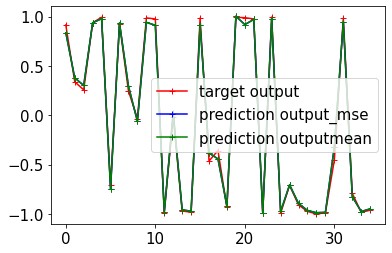

In [ ]:
plt.figure()
plt.plot(y_test[:,0],marker='+',c='red')
plt.plot(yout_mse[:,0],marker='+',c='blue')
plt.plot(yout_mean[:,0],marker='+',c='green')
plt.legend(['target output','prediction output_mse','prediction outputmean'])
plt.show()

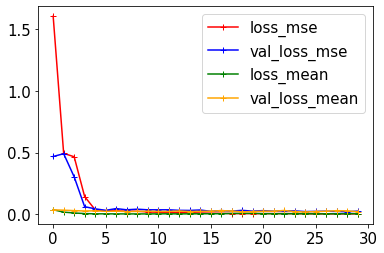

In [ ]:
plt.figure()
plt.plot(history_mse.history['loss'],marker='+',c='red')
plt.plot(history_mse.history['val_loss'],marker='+',c='blue')
plt.plot(history_mean.history['loss'],marker='+',c='green')
plt.plot(history_mean.history['val_loss'],marker='+',c='orange')
plt.legend(['loss_mse','val_loss_mse','loss_mean','val_loss_mean'])
plt.show()

part6 SGD & ADAM

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
model.add(TimeDistributed(MaxPooling2D((2,2))))

model.add(TimeDistributed(Dropout(rate=0.25)))
model.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))


model.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))

model.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100 ))
model.add(Dense(128))
model.add(Dense(2))

In [ ]:
model.compile(optimizer='SGD', loss='MSE', metrics=['accuracy'])
t0_SGD=datetime.datetime.now()
history_SGD =model.fit(x_train,y_train , batch_size=8, epochs=30, validation_split=0.2)
t1_SGD=datetime.datetime.now()

Epoch 1/30
11/11 [==============================] - 15s 488ms/step - loss: 1.1261 - accuracy: 0.5734 - val_loss: 0.4822 - val_accuracy: 0.5714
Epoch 2/30
11/11 [==============================] - 3s 279ms/step - loss: 0.4700 - accuracy: 0.6267 - val_loss: 0.4529 - val_accuracy: 0.5714
Epoch 3/30
11/11 [==============================] - 3s 281ms/step - loss: 0.4382 - accuracy: 0.5661 - val_loss: 0.4309 - val_accuracy: 0.5714
Epoch 4/30
11/11 [==============================] - 3s 281ms/step - loss: 0.3972 - accuracy: 0.6269 - val_loss: 0.3919 - val_accuracy: 0.5714
Epoch 5/30
11/11 [==============================] - 3s 279ms/step - loss: 0.3607 - accuracy: 0.6333 - val_loss: 0.3288 - val_accuracy: 0.6190
Epoch 6/30
11/11 [==============================] - 3s 280ms/step - loss: 0.2721 - accuracy: 0.9177 - val_loss: 0.2157 - val_accuracy: 0.9524
Epoch 7/30
11/11 [==============================] - 3s 280ms/step - loss: 0.1372 - accuracy: 0.9645 - val_loss: 0.0909 - val_accuracy: 0.9524
Epoch

In [ ]:
print('Accuracy = ', history_SGD.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1_SGD-t0_SGD)
deghat_SGD=model.evaluate(x_test,y_test)
print('deghat:',deghat_SGD[1]*100)

Accuracy =  95.23809552192688 %
Time =  0:01:45.045135
2/2 [==============================] - 2s 329ms/step - loss: 0.0528 - accuracy: 0.9429
deghat: 94.28571462631226


In [ ]:
yout_SGD=model.predict(x_test)
print(yout_SGD.shape)

(35, 2)


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
t0_Adam=datetime.datetime.now()
history_Adam =model.fit(x_train,y_train , batch_size=8, epochs=30, validation_split=0.2)
t1_Adam=datetime.datetime.now()

Epoch 1/30
11/11 [==============================] - 5s 328ms/step - loss: 1.8194 - accuracy: 0.7101 - val_loss: 0.0643 - val_accuracy: 0.9524
Epoch 2/30
11/11 [==============================] - 3s 280ms/step - loss: 0.0633 - accuracy: 0.9702 - val_loss: 0.0974 - val_accuracy: 0.9524
Epoch 3/30
11/11 [==============================] - 3s 278ms/step - loss: 0.0411 - accuracy: 0.9292 - val_loss: 0.0754 - val_accuracy: 0.9048
Epoch 4/30
11/11 [==============================] - 3s 279ms/step - loss: 0.0279 - accuracy: 0.9447 - val_loss: 0.0516 - val_accuracy: 0.9524
Epoch 5/30
11/11 [==============================] - 3s 279ms/step - loss: 0.0229 - accuracy: 0.9724 - val_loss: 0.0635 - val_accuracy: 0.9524
Epoch 6/30
11/11 [==============================] - 3s 280ms/step - loss: 0.0257 - accuracy: 0.9888 - val_loss: 0.0815 - val_accuracy: 0.9524
Epoch 7/30
11/11 [==============================] - 3s 291ms/step - loss: 0.0182 - accuracy: 0.9671 - val_loss: 0.0705 - val_accuracy: 0.9524
Epoch 

In [ ]:
print('Accuracy = ', history_Adam.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1_Adam-t0_Adam)
deghat_Adam=model.evaluate(x_test,y_test)
print('deghat:',deghat_Adam[1]*100)

Accuracy =  100.0 %
Time =  0:01:34.302107
2/2 [==============================] - 0s 37ms/step - loss: 0.0446 - accuracy: 0.9714
deghat: 97.14285731315613


In [ ]:
yout_Adam=model.predict(x_test)
print(yout_Adam.shape)

(35, 2)


<function matplotlib.pyplot.show>

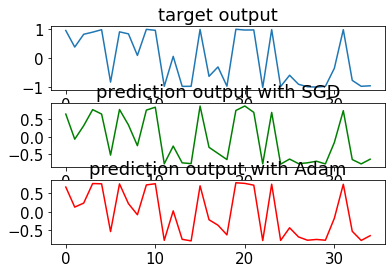

In [ ]:
plt.figure()
plt.subplot(311)
plt.plot(y_test[:,0])
plt.title('target output')
plt.subplot(312)
plt.plot(yout_SGD[:,0],'g')
plt.title('prediction output with SGD')
plt.subplot(313)
plt.plot(yout_Adam[:,0],'r')
plt.title('prediction output with Adam')
plt.show

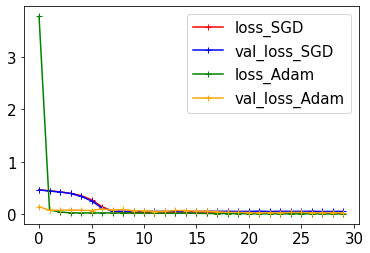

In [ ]:
plt.figure()
plt.plot(history_SGD.history['loss'],marker='+',c='red')
plt.plot(history_SGD.history['val_loss'],marker='+',c='blue')
plt.plot(history_Adam.history['loss'],marker='+',c='green')
plt.plot(history_Adam.history['val_loss'],marker='+',c='orange')
plt.legend(['loss_SGD','val_loss_SGD','loss_Adam','val_loss_Adam'])
plt.show()

part 7

In [ ]:
input_data_5=np.zeros((136,10,360,360,3))
for i in range(136):
  for j in range(10):
    input_data_5[i,:,:,:,:]=d[j+i]

255.0
0.0
(136, 10, 360, 360, 3)


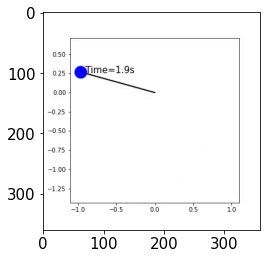

In [ ]:
print(np.max(input_data_5))
print(np.min(input_data_5))
input_data_5=input_data_5/np.max(input_data_5)
print(input_data_5.shape)
g5=input_data_5[20]
plt.imshow(g5[8])

In [ ]:
target_5=np.zeros((136,10))
for i in range(136):
  for j in range(5):
    target_5[i,j]=x[i+j+10]
    target_5[i,j+5]=y[i+j+10]

In [ ]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(input_data_5,target_5, test_size=0.25, random_state=42)
print(x_train5.shape)
print(y_train5.shape)
print(x_test5.shape)
print(y_test5.shape)

(102, 10, 360, 360, 3)
(102, 10)
(34, 10, 360, 360, 3)
(34, 10)


In [ ]:
best_model = Sequential()
best_model.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
best_model.add(TimeDistributed(MaxPooling2D((2,2))))

best_model.add(TimeDistributed(Dropout(rate=0.25)))
best_model.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
best_model.add(TimeDistributed(MaxPooling2D((2,2))))


best_model.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
best_model.add(TimeDistributed(MaxPooling2D((2,2))))
best_model.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
best_model.add(TimeDistributed(MaxPooling2D((2,2))))

best_model.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
best_model.add(TimeDistributed(MaxPooling2D((2,2))))
best_model.add(TimeDistributed(Flatten()))
best_model.add(LSTM(100 ))
best_model.add(Dense(128))
best_model.add(Dense(10))

In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
best_model.compile(optimizer=Adam_opt, loss='mean_squared_error', metrics=['accuracy'])
t0_5=datetime.datetime.now()
history_5 =best_model.fit(x_train5,y_train5 , batch_size=8, epochs=30, validation_split=0.2)
t1_5=datetime.datetime.now()

Epoch 1/30
11/11 [==============================] - 15s 424ms/step - loss: 1.0354 - accuracy: 0.0366 - val_loss: 0.4686 - val_accuracy: 0.1429
Epoch 2/30
11/11 [==============================] - 3s 269ms/step - loss: 0.4674 - accuracy: 0.0349 - val_loss: 0.3295 - val_accuracy: 0.4286
Epoch 3/30
11/11 [==============================] - 3s 269ms/step - loss: 0.2396 - accuracy: 0.3700 - val_loss: 0.2271 - val_accuracy: 0.3333
Epoch 4/30
11/11 [==============================] - 3s 267ms/step - loss: 0.1476 - accuracy: 0.4680 - val_loss: 0.2406 - val_accuracy: 0.3333
Epoch 5/30
11/11 [==============================] - 3s 269ms/step - loss: 0.1453 - accuracy: 0.4554 - val_loss: 0.2752 - val_accuracy: 0.2381
Epoch 6/30
11/11 [==============================] - 3s 268ms/step - loss: 0.1301 - accuracy: 0.4420 - val_loss: 0.2781 - val_accuracy: 0.3333
Epoch 7/30
11/11 [==============================] - 3s 269ms/step - loss: 0.1305 - accuracy: 0.4217 - val_loss: 0.2711 - val_accuracy: 0.4286
Epoch

In [ ]:
print('Accuracy = ', history_5.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1_5-t0_5)
deghat5=best_model.evaluate(x_test5,y_test5)
print('deghat:',deghat5[1]*100)

Accuracy =  61.90476417541504 %
Time =  0:01:40.385964
2/2 [==============================] - 2s 247ms/step - loss: 0.1459 - accuracy: 0.6176
deghat: 61.764705181121826


In [ ]:
yout_5=best_model.predict(x_test5)
print(yout_5.shape)

(34, 10)


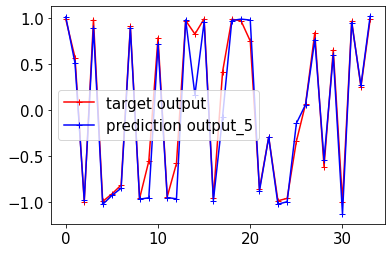

In [ ]:
plt.figure()
plt.plot(y_test5[:,0],marker='+',c='red')
plt.plot(yout_5[:,0],marker='+',c='blue')
plt.legend(['target output','prediction output_5'])
plt.show()

255.0
0.0
(131, 10, 360, 360, 3)
0.9999918035493992
(98, 10, 360, 360, 3)
(98, 20)
(33, 10, 360, 360, 3)
(33, 20)


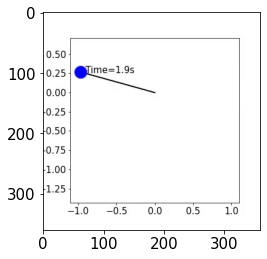

In [ ]:
input_data_10=np.zeros((131,10,360,360,3))
for i in range(131):
  for j in range(10):
    input_data_10[i,:,:,:,:]=d[j+i]


print(np.max(input_data_10))
print(np.min(input_data_10))
input_data_10=input_data_10/np.max(input_data_10)
print(input_data_10.shape)
g10=input_data_10[20]
plt.imshow(g10[8])


target_10=np.zeros((131,20))
for i in range(131):
  for j in range(10):
    target_10[i,j]=x[i+j+10]
    target_10[i,j+10]=y[i+j+10]
print(np.max(target_10))

x_train10, x_test10, y_train10, y_test10 = train_test_split(input_data_10,target_10, test_size=0.25, random_state=42)
print(x_train10.shape)
print(y_train10.shape)
print(x_test10.shape)
print(y_test10.shape)

In [ ]:
best_model_10 = Sequential()
best_model_10.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
best_model_10.add(TimeDistributed(MaxPooling2D((2,2))))

best_model_10.add(TimeDistributed(Dropout(rate=0.25)))
best_model_10.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
best_model_10.add(TimeDistributed(MaxPooling2D((2,2))))


best_model_10.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
best_model_10.add(TimeDistributed(MaxPooling2D((2,2))))
best_model_10.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
best_model_10.add(TimeDistributed(MaxPooling2D((2,2))))

best_model_10.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
best_model_10.add(TimeDistributed(MaxPooling2D((2,2))))
best_model_10.add(TimeDistributed(Flatten()))
best_model_10.add(LSTM(100 ))
best_model_10.add(Dense(128))
best_model_10.add(Dense(20))

In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
best_model_10.compile(optimizer=Adam_opt, loss='mean_squared_error', metrics=['accuracy'])
t0_10=datetime.datetime.now()
history_10 =best_model_10.fit(x_train10,y_train10 , batch_size=8, epochs=30, validation_split=0.2)
t1_10=datetime.datetime.now()

print('Accuracy = ', history_10.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1_10-t0_10)
deghat10=best_model_10.evaluate(x_test10,y_test10)
print('deghat:',deghat10[1]*100)


Epoch 1/30
10/10 [==============================] - 6s 364ms/step - loss: 0.6520 - accuracy: 0.1112 - val_loss: 0.4733 - val_accuracy: 0.1500
Epoch 2/30
10/10 [==============================] - 3s 286ms/step - loss: 0.4965 - accuracy: 0.1264 - val_loss: 0.4493 - val_accuracy: 0.1500
Epoch 3/30
10/10 [==============================] - 3s 285ms/step - loss: 0.4668 - accuracy: 0.0574 - val_loss: 0.4493 - val_accuracy: 0.1500
Epoch 4/30
10/10 [==============================] - 3s 284ms/step - loss: 0.4833 - accuracy: 0.1397 - val_loss: 0.4415 - val_accuracy: 0.1000
Epoch 5/30
10/10 [==============================] - 3s 285ms/step - loss: 0.4474 - accuracy: 0.0329 - val_loss: 0.3391 - val_accuracy: 0.2500
Epoch 6/30
10/10 [==============================] - 3s 285ms/step - loss: 0.3164 - accuracy: 0.1189 - val_loss: 0.2958 - val_accuracy: 0.2000
Epoch 7/30
10/10 [==============================] - 3s 283ms/step - loss: 0.2853 - accuracy: 0.1154 - val_loss: 0.2998 - val_accuracy: 0.1500
Epoch 

In [ ]:
yout_10=best_model_10.predict(x_test10)
print(yout_10.shape)
print(np.max(yout_10))

(33, 20)
1.1492085


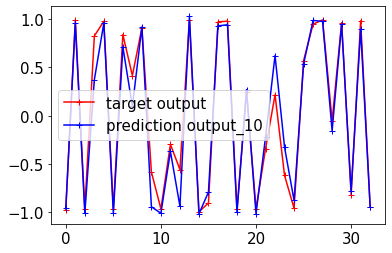

In [ ]:
plt.figure()
plt.plot(y_test10[:,0],marker='+',c='red')
plt.plot(yout_10[:,0],marker='+',c='blue')
plt.legend(['target output','prediction output_10'])
plt.show()

In [ ]:
input_data_20=np.zeros((121,10,360,360,3))
for i in range(121):
  for j in range(10):
    input_data_20[i,:,:,:,:]=d[j+i]


print(np.max(input_data_20))
print(np.min(input_data_20))
input_data_20=input_data_20/np.max(input_data_20)
print(input_data_20.shape)


target_20=np.zeros((121,40))
for i in range(121):
  for j in range(20):
    target_20[i,j]=x[i+j+10]
    target_20[i,j+20]=y[i+j+10]
print(np.max(target_20))

x_train20, x_test20, y_train20, y_test20 = train_test_split(input_data_20,target_20, test_size=0.25, random_state=42)
print(x_train20.shape)
print(y_train20.shape)
print(x_test20.shape)
print(y_test20.shape)

255.0
0.0
(121, 10, 360, 360, 3)
0.9999918035493992
(90, 10, 360, 360, 3)
(90, 40)
(31, 10, 360, 360, 3)
(31, 40)


In [ ]:
best_model_20 = Sequential()
best_model_20.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
best_model_20.add(TimeDistributed(MaxPooling2D((2,2))))

best_model_20.add(TimeDistributed(Dropout(rate=0.25)))
best_model_20.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
best_model_20.add(TimeDistributed(MaxPooling2D((2,2))))


best_model_20.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
best_model_20.add(TimeDistributed(MaxPooling2D((2,2))))
best_model_20.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
best_model_20.add(TimeDistributed(MaxPooling2D((2,2))))

best_model_20.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
best_model_20.add(TimeDistributed(MaxPooling2D((2,2))))
best_model_20.add(TimeDistributed(Flatten()))
best_model_20.add(LSTM(100 ))
best_model_20.add(Dense(128))
best_model_20.add(Dense(40))

In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
best_model_20.compile(optimizer=Adam_opt, loss='mean_squared_error', metrics=['accuracy'])
t0_20=datetime.datetime.now()
history_20 =best_model_20.fit(x_train20,y_train20 , batch_size=8, epochs=30, validation_split=0.2)
t1_20=datetime.datetime.now()

print('Accuracy = ', history_10.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1_20-t0_20)
deghat20=best_model_20.evaluate(x_test20,y_test20)
print('deghat:',deghat20[1]*100)


Epoch 1/30
9/9 [==============================] - 7s 457ms/step - loss: 0.7738 - accuracy: 0.0138 - val_loss: 0.4822 - val_accuracy: 0.0556
Epoch 2/30
9/9 [==============================] - 3s 285ms/step - loss: 0.4728 - accuracy: 0.0200 - val_loss: 0.4749 - val_accuracy: 0.0556
Epoch 3/30
9/9 [==============================] - 3s 285ms/step - loss: 0.4606 - accuracy: 0.0426 - val_loss: 0.4745 - val_accuracy: 0.1111
Epoch 4/30
9/9 [==============================] - 3s 288ms/step - loss: 0.4646 - accuracy: 0.0424 - val_loss: 0.4441 - val_accuracy: 0.1111
Epoch 5/30
9/9 [==============================] - 3s 284ms/step - loss: 0.3907 - accuracy: 0.2671 - val_loss: 0.3315 - val_accuracy: 0.1111
Epoch 6/30
9/9 [==============================] - 3s 286ms/step - loss: 0.2495 - accuracy: 0.2335 - val_loss: 0.3119 - val_accuracy: 0.3333
Epoch 7/30
9/9 [==============================] - 3s 284ms/step - loss: 0.1926 - accuracy: 0.3168 - val_loss: 0.3006 - val_accuracy: 0.2222
Epoch 8/30
9/9 [====

In [ ]:
yout_20=best_model_20.predict(x_test20)
print(yout_20.shape)
print(np.max(yout_20))

(31, 40)
1.4649293


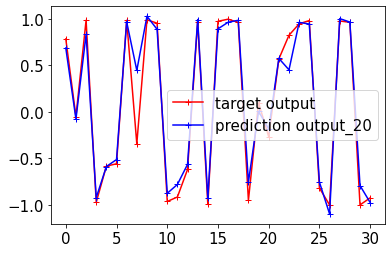

In [ ]:
plt.figure()
plt.plot(y_test20[:,0],marker='+',c='red')
plt.plot(yout_20[:,0],marker='+',c='blue')
plt.legend(['target output','prediction output_20'])
plt.show()

In [ ]:
input_data_50=np.zeros((91,10,360,360,3))
for i in range(91):
  for j in range(10):
    input_data_50[i,:,:,:,:]=d[j+i]


print(np.max(input_data_50))
print(np.min(input_data_50))
input_data_50=input_data_50/np.max(input_data_50)
print(input_data_50.shape)


target_50=np.zeros((91,100))
for i in range(91):
  for j in range(50):
    target_50[i,j]=x[i+j+10]
    target_50[i,j+50]=y[i+j+10]
print(np.max(target_50))

x_train50, x_test50, y_train50, y_test50 = train_test_split(input_data_50,target_50, test_size=0.25, random_state=42)
print(x_train50.shape)
print(y_train50.shape)
print(x_test50.shape)
print(y_test50.shape)

255.0
0.0
(91, 10, 360, 360, 3)
0.9999918035493992
(68, 10, 360, 360, 3)
(68, 100)
(23, 10, 360, 360, 3)
(23, 100)


In [ ]:
best_model_50 = Sequential()
best_model_50.add(TimeDistributed(Conv2D(32, (7, 7),activation='relu', input_shape=(10, 360, 360, 3))))
best_model_50.add(TimeDistributed(MaxPooling2D((2,2))))

best_model_50.add(TimeDistributed(Dropout(rate=0.25)))
best_model_50.add(TimeDistributed(Conv2D(64, (5, 5),activation='relu')))
best_model_50.add(TimeDistributed(MaxPooling2D((2,2))))


best_model_50.add(TimeDistributed(Conv2D(128, (5, 5),activation='relu')))
best_model_50.add(TimeDistributed(MaxPooling2D((2,2))))
best_model_50.add(TimeDistributed(Conv2D(256, (3, 3),activation='relu')))
best_model_50.add(TimeDistributed(MaxPooling2D((2,2))))

best_model_50.add(TimeDistributed(Conv2D(512, (3, 3),activation='relu')))
best_model_50.add(TimeDistributed(MaxPooling2D((2,2))))
best_model_50.add(TimeDistributed(Flatten()))
best_model_50.add(LSTM(100 ))
best_model_50.add(Dense(128))
best_model_50.add(Dense(100))

In [ ]:
Adam_opt=optimizers.Adam(lr=0.001)
best_model_50.compile(optimizer=Adam_opt, loss='mean_squared_error', metrics=['accuracy'])
t0_50=datetime.datetime.now()
history_50 =best_model_50.fit(x_train50,y_train50 , batch_size=8, epochs=30, validation_split=0.2)
t1_50=datetime.datetime.now()

print('Accuracy = ', history_50.history['val_accuracy'][-1]*100,'%')
print('Time = ',t1_50-t0_50)
deghat50=best_model_50.evaluate(x_test50,y_test50)
print('deghat:',deghat50[1]*100)


Epoch 1/30
7/7 [==============================] - 15s 693ms/step - loss: 0.5968 - accuracy: 0.0072 - val_loss: 0.4872 - val_accuracy: 0.0000e+00
Epoch 2/30
7/7 [==============================] - 2s 312ms/step - loss: 0.4771 - accuracy: 0.0176 - val_loss: 0.4724 - val_accuracy: 0.0000e+00
Epoch 3/30
7/7 [==============================] - 2s 285ms/step - loss: 0.4523 - accuracy: 0.0501 - val_loss: 0.4720 - val_accuracy: 0.0000e+00
Epoch 4/30
7/7 [==============================] - 2s 283ms/step - loss: 0.4537 - accuracy: 0.0273 - val_loss: 0.4687 - val_accuracy: 0.0714
Epoch 5/30
7/7 [==============================] - 2s 282ms/step - loss: 0.4642 - accuracy: 0.0389 - val_loss: 0.4709 - val_accuracy: 0.0714
Epoch 6/30
7/7 [==============================] - 2s 284ms/step - loss: 0.4553 - accuracy: 0.0376 - val_loss: 0.4721 - val_accuracy: 0.0000e+00
Epoch 7/30
7/7 [==============================] - 2s 283ms/step - loss: 0.4711 - accuracy: 0.0267 - val_loss: 0.4652 - val_accuracy: 0.0000e+00

In [ ]:
yout_50=best_model_50.predict(x_test50)
print(yout_50.shape)
print(np.max(yout_50))

(23, 100)
1.3356631


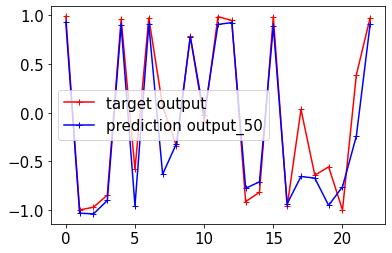

In [ ]:
plt.figure()
plt.plot(y_test50[:,0],marker='+',c='red')
plt.plot(yout_50[:,0],marker='+',c='blue')
plt.legend(['target output','prediction output_50'])
plt.show()